In [68]:
%matplotlib inline
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import csv


def csv_to_dict(filename):
    """
        dict structure is {
            '11' : { # extent value
                'memory' : [...],
                ...
            },
            ...
        }
    """
    data = defaultdict(lambda : defaultdict(list))
    with open(filename) as f:
        reader = csv.DictReader(f)
        for line in reader:
            line_data = data[int(line['extent'])]
            for k, v in line.iteritems():
                line_data[k].append(float(v))
            data[line['extent']] = line_data
    return data

def x_vs_y(name, x_key, y_key, extent=None):
    data = csv_to_dict("profile-dump-%s.csv" % name)
   
    fig = plt.figure()
    ax = plt.gca()

    extent_range = range(1, 17) if not extent else range(extent, extent + 1)
    colors = cm.rainbow(np.linspace(0, 1, len(extent_range)))
    for c, e in zip(colors,extent_range):
        x_values = data[e][x_key]
        y_values = data[e][y_key]
#         x.extend(x_values)
#         y.extend(y_values)
#         x.append(np.average(x_values))
#         y.append(np.average(y_values))
    

        v = zip(x_values,y_values)
        v.sort(key=lambda point: point[0])
        x, y = zip(*v)
        ax.scatter(x, y, c=c, label=e)
#         ax.plot(x, y,  label=e, linewidth=2)
    
    if extent:
        name += " extent: %d" % extent
        
    ax.set_title("%s vs %s: %s" %(x_key, y_key, name))
    ax.set_xlabel(x_key)
    ax.set_ylabel(y_key)
    ax.set_ylim(ymin=0) # must be after plot
    plt.legend(loc='best', bbox_to_anchor=(1.4, 1), ncol=2)
    plt.show()

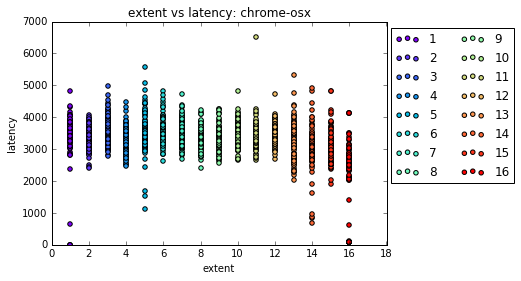

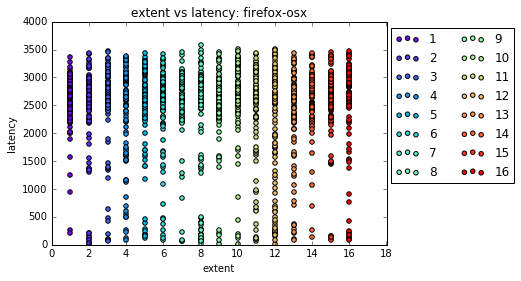

In [69]:
x_vs_y("chrome-osx", "extent", "latency")
x_vs_y("firefox-osx", "extent", "latency")